<a href="https://colab.research.google.com/github/andrewwells991/mds_thesis/blob/main/12_test_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay 
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%capture
lr_std = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/lr_std', 'rb'))
nb_std = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/nb_std', 'rb'))
rf_std = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/rf_std', 'rb'))
#rf_wgt = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/rf_wgt', 'rb'))
xgb_std = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/xgb_std', 'rb'))
knn_std = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/knn_std', 'rb'))
rf_over = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/rf_over', 'rb'))
xgb_over = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/xgb_over', 'rb'))
rf_urban_over = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/rf_urban_over', 'rb'))
rf_semi_urban_over = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/rf_semi_urban_over', 'rb'))
rf_rural_over = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/rf_rural_over', 'rb'))

In [ ]:
nb_over = pickle.load(open('/content/gdrive/MyDrive/mds_thesis/8_saved_models/nb_over', 'rb'))

In [ ]:
#Labeled dataset
df_test = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/6_split_data/df_test.csv')
df_test = df_test[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

df_test_over = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/6_split_data/df_test_over.csv')
df_test_over = df_test_over[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

df_urban_test_over = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/6_split_data/df_urban_test_over.csv')
df_urban_test_over = df_urban_test_over[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

df_semi_urban_test_over = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/6_split_data/df_semi_urban_test_over.csv')
df_semi_urban_test_over = df_semi_urban_test_over[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

df_rural_test_over = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/6_split_data/df_rural_test_over.csv')
df_rural_test_over = df_rural_test_over[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

In [ ]:
X_test = df_test.drop(['building'], axis = 1)
y_test = df_test['building']

In [ ]:
X_test_over = df_test_over.drop(['building'], axis = 1)
y_test_over = df_test_over['building']

In [ ]:
X_urban_test_over = df_urban_test_over.drop(['building'], axis = 1)
y_urban_test_over = df_urban_test_over['building']

X_semi_urban_test_over = df_semi_urban_test_over.drop(['building'], axis = 1)
y_semi_urban_test_over = df_semi_urban_test_over['building']

X_rural_test_over = df_rural_test_over.drop(['building'], axis = 1)
y_rural_test_over = df_rural_test_over['building']

##Model evaluation

###Unbalanced data

Naive Bayes

In [ ]:
#Evaluate
y_pred_nb_std = nb_std.predict(X_test)
print(classification_report(y_test, y_pred_nb_std))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.94      0.96    321034
           1       0.19      0.31      0.24     13673

    accuracy                           0.92    334707
   macro avg       0.58      0.63      0.60    334707
weighted avg       0.94      0.92      0.93    334707



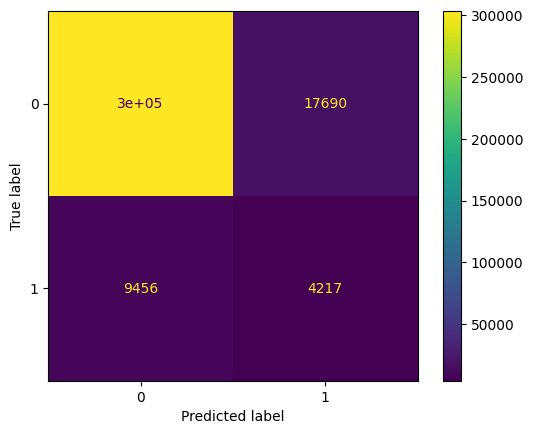

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb_std)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

Logisitc regression

In [ ]:
#Evaluate
y_pred_lr_std = lr_std.predict(X_test)
print(classification_report(y_test, y_pred_lr_std))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    321034
           1       0.41      0.03      0.06     13673

    accuracy                           0.96    334707
   macro avg       0.68      0.52      0.52    334707
weighted avg       0.94      0.96      0.94    334707



Random forest

In [ ]:
#Evaluate
y_pred_rf_std = rf_std.predict(X_test)
print(classification_report(y_test, y_pred_rf_std))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    321034
           1       0.66      0.15      0.24     13673

    accuracy                           0.96    334707
   macro avg       0.81      0.57      0.61    334707
weighted avg       0.95      0.96      0.95    334707



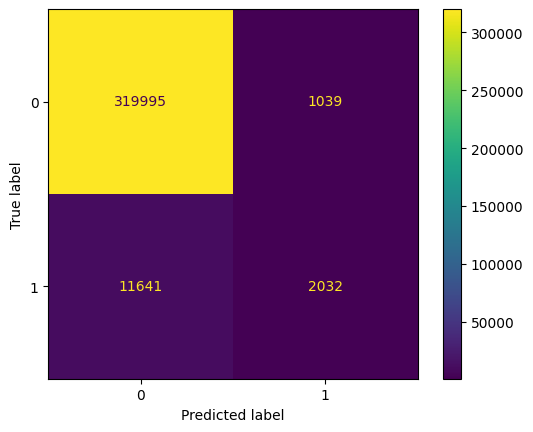

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_std)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

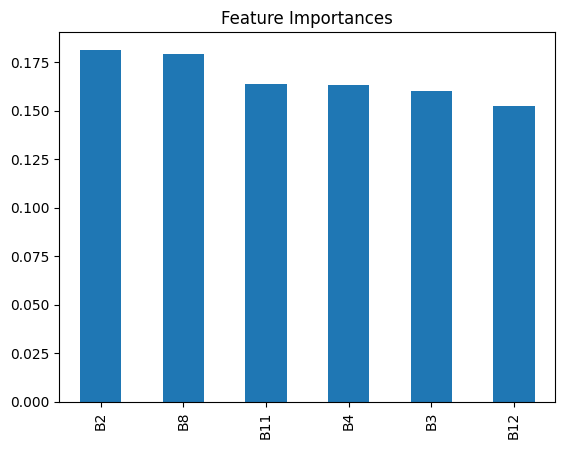

In [ ]:
# Plot the feature importances
feature_importances = pd.Series(rf_std.feature_importances_, index = X_test.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Random forest weighted

In [ ]:
#Evaluate
y_pred_rf_wgt = rf_wgt.predict(X_test)
print(classification_report(y_test, y_pred_rf_wgt))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    321034
           1       0.72      0.11      0.20     13673

    accuracy                           0.96    334707
   macro avg       0.84      0.56      0.59    334707
weighted avg       0.95      0.96      0.95    334707



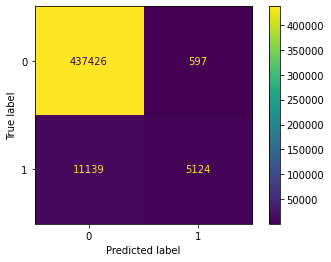

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_wgt)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

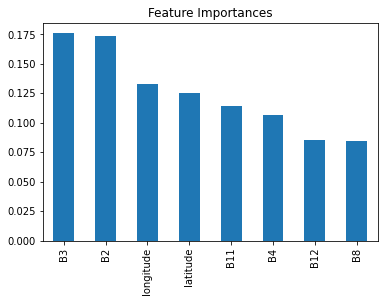

In [ ]:
# Plot the feature importances
feature_importances = pd.Series(rf_wgt.feature_importances_, index = X_test.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

XGBoost

In [ ]:
#Evaluate
y_pred_xgb_std = xgb_std.predict(X_test)
print(classification_report(y_test, y_pred_xgb_std))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    438023
           1       0.85      0.35      0.49     16263

    accuracy                           0.97    454286
   macro avg       0.91      0.67      0.74    454286
weighted avg       0.97      0.97      0.97    454286



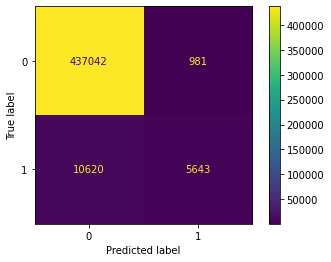

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_std)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

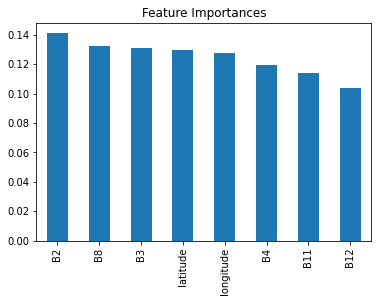

In [ ]:
# Plot the feature importances
feature_importances = pd.Series(xgb_std.feature_importances_, index = X_test.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

KNN

In [ ]:
#Evaluate
y_pred_knn_std = knn_std.predict(X_test)
print(classification_report(y_test, y_pred_knn_std))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.99      0.98    438023
           1       0.46      0.18      0.26     16263

    accuracy                           0.96    454286
   macro avg       0.72      0.59      0.62    454286
weighted avg       0.95      0.96      0.96    454286



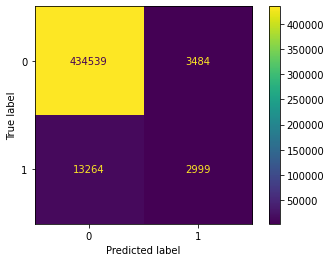

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn_std)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

###Over-sampled data

Random forest

In [ ]:
#Evaluate
y_pred_rf_over = rf_over.predict(X_test_over)
print(classification_report(y_test_over, y_pred_rf_over))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    320564
           1       0.99      1.00      0.99    321147

    accuracy                           0.99    641711
   macro avg       0.99      0.99      0.99    641711
weighted avg       0.99      0.99      0.99    641711



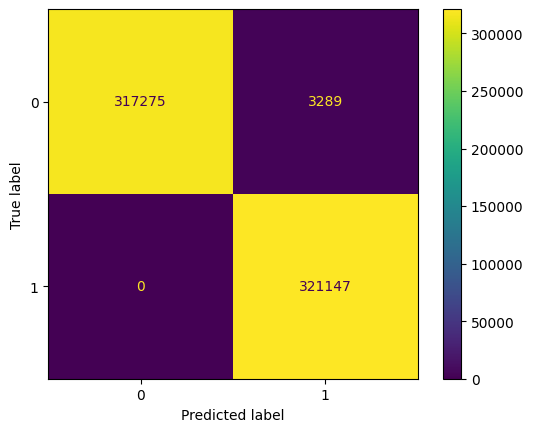

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_rf_over)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

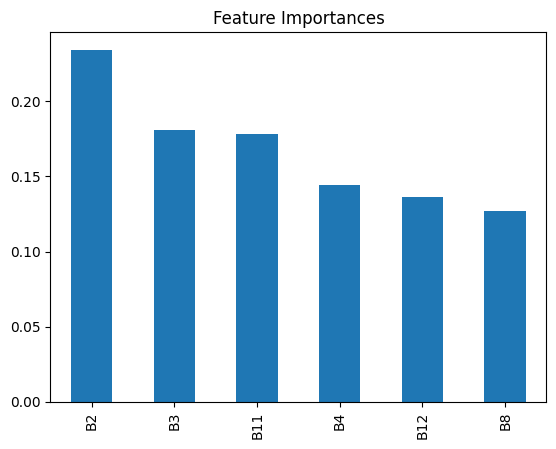

In [ ]:
# Plot the feature importances
feature_importances = pd.Series(rf_over.feature_importances_, index = X_test_over.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

XGBoost

In [ ]:
#Evaluate
y_pred_xgb_over = xgb_over.predict(X_test_over)
print(classification_report(y_test_over, y_pred_xgb_over))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82    320564
           1       0.81      0.85      0.83    321147

    accuracy                           0.83    641711
   macro avg       0.83      0.83      0.83    641711
weighted avg       0.83      0.83      0.83    641711



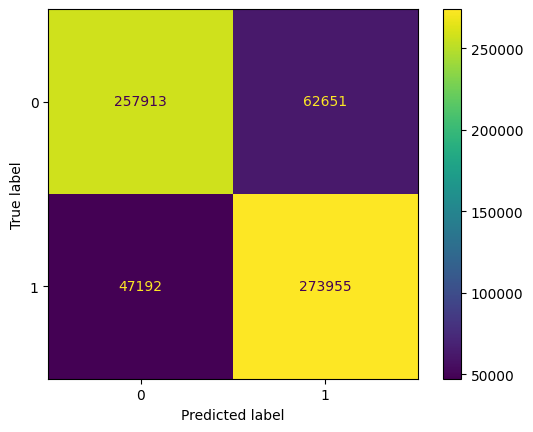

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_xgb_over)
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

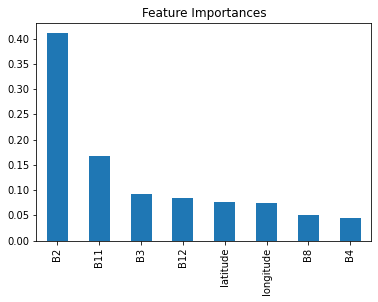

In [ ]:
# Plot the feature importances
feature_importances = pd.Series(xgb_over.feature_importances_, index = X_test_over.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Random forest (urbanity)

In [ ]:
#Evaluate
y_pred_rf_urban_over = rf_urban_over.predict(X_urban_test_over)
print(classification_report(y_urban_test_over, y_pred_rf_urban_over))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.97      0.99    124004
           1       0.97      1.00      0.99    124343

    accuracy                           0.99    248347
   macro avg       0.99      0.99      0.99    248347
weighted avg       0.99      0.99      0.99    248347



In [ ]:
#Evaluate
y_pred_rf_semi_urban_over = rf_semi_urban_over.predict(X_semi_urban_test_over)
print(classification_report(y_semi_urban_test_over, y_pred_rf_semi_urban_over))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124978
           1       1.00      1.00      1.00    125394

    accuracy                           1.00    250372
   macro avg       1.00      1.00      1.00    250372
weighted avg       1.00      1.00      1.00    250372



In [ ]:
#Evaluate
y_pred_rf_rural_over = rf_rural_over.predict(X_rural_test_over)
print(classification_report(y_rural_test_over, y_pred_rf_rural_over))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71489
           1       1.00      1.00      1.00     71503

    accuracy                           1.00    142992
   macro avg       1.00      1.00      1.00    142992
weighted avg       1.00      1.00      1.00    142992



##ROC-AUC Analysis

ROC-AUC for unbalanced data

In [ ]:
%%capture
# nb_std
fpr_nb_std, tpr_nb_std, _ = roc_curve(y_test, nb_std.predict_proba(X_test)[:,1])
roc_auc_nb_std = auc(fpr_nb_std, tpr_nb_std)
# lr_std
fpr_lr_std, tpr_lr_std, _ = roc_curve(y_test, lr_std.predict_proba(X_test)[:,1])
roc_auc_lr_std = auc(fpr_lr_std, tpr_lr_std)
# rf_std
fpr_rf_std, tpr_rf_std, _ = roc_curve(y_test, rf_std.predict_proba(X_test)[:,1])
roc_auc_rf_std = auc(fpr_rf_std, tpr_rf_std)
# rf_wgt
fpr_rf_wgt, tpr_rf_wgt, _ = roc_curve(y_test, rf_wgt.predict_proba(X_test)[:,1])
roc_auc_rf_wgt = auc(fpr_rf_wgt, tpr_rf_wgt)
# xgb_std
fpr_xgb_std, tpr_xgb_std, _ = roc_curve(y_test, xgb_std.predict_proba(X_test)[:,1])
roc_auc_xgb_std = auc(fpr_xgb_std, tpr_xgb_std)
# knn_std
fpr_knn_std, tpr_knn_std, _ = roc_curve(y_test, knn_std.predict_proba(X_test)[:,1])
roc_auc_knn_std = auc(fpr_knn_std, tpr_knn_std)

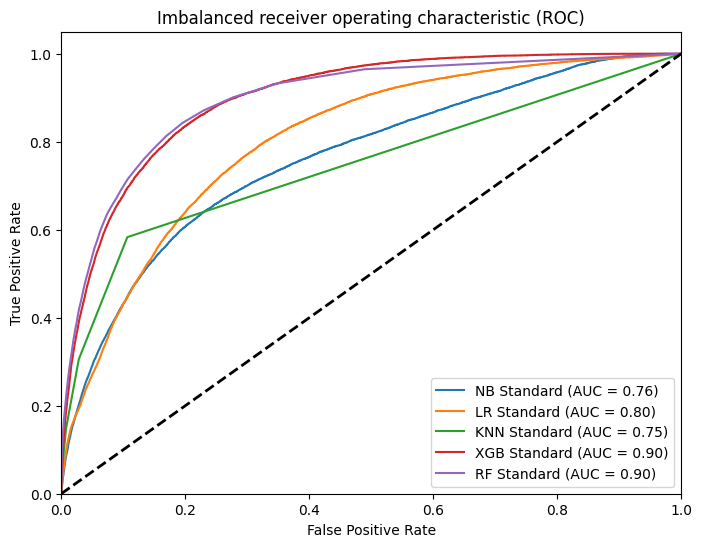

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(fpr_nb_std, tpr_nb_std, label='NB Standard (AUC = %0.2f)' % roc_auc_nb_std)
plt.plot(fpr_lr_std, tpr_lr_std, label='LR Standard (AUC = %0.2f)' % roc_auc_lr_std)

plt.plot(fpr_knn_std, tpr_knn_std, label='KNN Standard (AUC = %0.2f)' % roc_auc_knn_std)
plt.plot(fpr_xgb_std, tpr_xgb_std, label='XGB Standard (AUC = %0.2f)' % roc_auc_xgb_std)
plt.plot(fpr_rf_std, tpr_rf_std, label='RF Standard (AUC = %0.2f)' % roc_auc_rf_std)
#plt.plot(fpr_rf_wgt, tpr_rf_wgt, label='RF Weighted (AUC = %0.2f)' % roc_auc_rf_wgt)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Imbalanced receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%%capture
y_scores_nb_std = nb_std.predict_proba(X_test)[:, 1]
precision_nb, recall_nb, thresholds = precision_recall_curve(y_test, y_scores_nb_std)
auc_pr_nb_std = auc(recall_nb, precision_nb)

y_scores_lr_std = lr_std.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, thresholds = precision_recall_curve(y_test, y_scores_lr_std)
auc_pr_lr_std = auc(recall_lr, precision_lr)

y_scores_rf_std = rf_std.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, thresholds = precision_recall_curve(y_test, y_scores_rf_std)
auc_pr_rf_std = auc(recall_rf, precision_rf)

y_scores_rf_wgt = rf_wgt.predict_proba(X_test)[:, 1]
precision_rf_wgt, recall_rf_wgt, thresholds = precision_recall_curve(y_test, y_scores_rf_wgt)
auc_pr_rf_wgt = auc(recall_rf_wgt, precision_rf_wgt)

y_scores_xgb_std = xgb_std.predict_proba(X_test)[:, 1]
precision_xgb, recall_xgb, thresholds = precision_recall_curve(y_test, y_scores_xgb_std)
auc_pr_xgb_std = auc(recall_xgb, precision_xgb)

y_scores_knn_std = knn_std.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, thresholds = precision_recall_curve(y_test, y_scores_knn_std)
auc_pr_knn_std = auc(recall_knn, precision_knn)

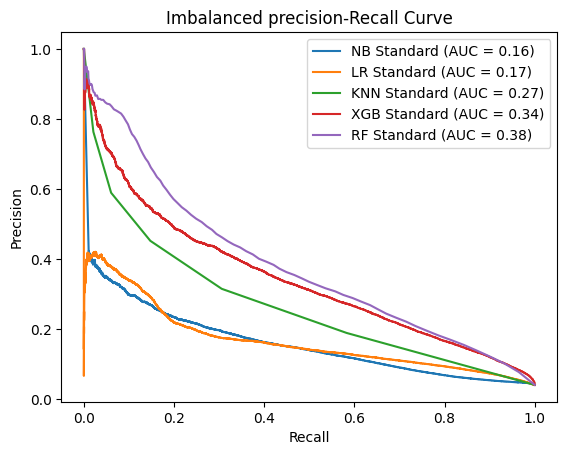

In [ ]:
plt.plot(recall_nb, precision_nb, label = 'NB Standard (AUC = %0.2f)' % auc_pr_nb_std)
plt.plot(recall_lr, precision_lr, label = 'LR Standard (AUC = %0.2f)' % auc_pr_lr_std)
plt.plot(recall_knn, precision_knn, label = 'KNN Standard (AUC = %0.2f)' % auc_pr_knn_std)
plt.plot(recall_xgb, precision_xgb, label = 'XGB Standard (AUC = %0.2f)' % auc_pr_xgb_std)
plt.plot(recall_rf, precision_rf, label = 'RF Standard (AUC = %0.2f)' % auc_pr_rf_std)
#plt.plot(recall_rf_wgt, precision_rf_wgt, label = 'RF Weighted (AUC = %0.2f)' % auc_pr_rf_wgt)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Imbalanced precision-Recall Curve')
plt.legend()
plt.show()

ROC-AUC for over-sampled data

In [ ]:
%%capture
# nb_over
#fpr_nb_over, tpr_nb_over, _ = roc_curve(y_test_over, nb_over.predict_proba(X_test_over)[:,1])
#roc_auc_nb_over = auc(fpr_nb_over, tpr_nb_over)

# rf_over
fpr_rf_over, tpr_rf_over, _ = roc_curve(y_test_over, rf_over.predict_proba(X_test_over)[:,1])
roc_auc_rf_over = auc(fpr_rf_over, tpr_rf_over)

# xgb_over
fpr_xgb_over, tpr_xgb_over, _ = roc_curve(y_test_over, xgb_over.predict_proba(X_test_over)[:,1])
roc_auc_xgb_over = auc(fpr_xgb_over, tpr_xgb_over)

X_rural_test_over 
y_rural_test_over 

# rf_urban_over
fpr_rf_urban_over, tpr_rf_urban_over, _ = roc_curve(y_urban_test_over, rf_urban_over.predict_proba(X_urban_test_over)[:,1])
roc_auc_rf_urban_over = auc(fpr_rf_urban_over, tpr_rf_urban_over)

# rf_semi_urban_over
fpr_rf_semi_urban_over, tpr_rf_semi_urban_over, _ = roc_curve(y_semi_urban_test_over, rf_semi_urban_over.predict_proba(X_semi_urban_test_over)[:,1])
roc_auc_rf_semi_urban_over = auc(fpr_rf_semi_urban_over, tpr_rf_semi_urban_over)

# rf_rural_over
fpr_rf_rural_over, tpr_rf_rural_over, _ = roc_curve(y_rural_test_over, rf_rural_over.predict_proba(X_rural_test_over)[:,1])
roc_auc_rf_rural_over = auc(fpr_rf_rural_over, tpr_rf_rural_over)

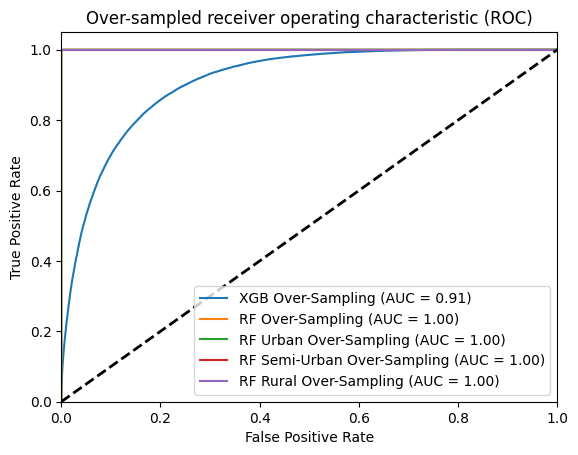

In [ ]:
#plt.plot(fpr_nb_over, tpr_nb_over, label='NB Over-Sampling (AUC = %0.2f)' % roc_auc_nb_over)
plt.plot(fpr_xgb_over, tpr_xgb_over, label='XGB Over-Sampling (AUC = %0.2f)' % roc_auc_xgb_over)
plt.plot(fpr_rf_over, tpr_rf_over, label='RF Over-Sampling (AUC = %0.2f)' % roc_auc_rf_over)
plt.plot(fpr_rf_urban_over, tpr_rf_urban_over, label='RF Urban Over-Sampling (AUC = %0.2f)' % roc_auc_rf_urban_over)
plt.plot(fpr_rf_semi_urban_over, tpr_rf_semi_urban_over, label='RF Semi-Urban Over-Sampling (AUC = %0.2f)' % roc_auc_rf_semi_urban_over)
plt.plot(fpr_rf_rural_over, tpr_rf_rural_over, label='RF Rural Over-Sampling (AUC = %0.2f)' % roc_auc_rf_rural_over)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Over-sampled receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%%capture
#y_scores_nb_over = nb_over.predict_proba(X_test)[:, 1]
#precision_nb_over, recall_nb_over, thresholds = precision_recall_curve(y_test, y_scores_nb_over)
#auc_pr_nb_over = auc(recall_nb_over, precision_nb_over)

y_scores_xgb_over = xgb_over.predict_proba(X_test)[:, 1]
precision_xgb_over, recall_xgb_over, thresholds = precision_recall_curve(y_test, y_scores_xgb_over)
auc_pr_xgb_over = auc(recall_xgb_over, precision_xgb_over)

y_scores_rf_over = rf_over.predict_proba(X_test)[:, 1]
precision_rf_over, recall_rf_over, thresholds = precision_recall_curve(y_test, y_scores_rf_over)
auc_pr_rf_over = auc(recall_rf_over, precision_rf_over)

y_scores_rf_urban_over = rf_urban_over.predict_proba(X_test)[:, 1]
precision_rf_urban_over, recall_rf_urban_over, thresholds = precision_recall_curve(y_test, y_scores_rf_urban_over)
auc_pr_rf_urban_over = auc(recall_rf_urban_over, precision_rf_urban_over)

y_scores_rf_semi_urban_over = rf_semi_urban_over.predict_proba(X_test)[:, 1]
precision_rf_semi_urban_over, recall_rf_semi_urban_over, thresholds = precision_recall_curve(y_test, y_scores_rf_semi_urban_over)
auc_pr_rf_semi_urban_over = auc(recall_rf_semi_urban_over, precision_rf_semi_urban_over)

y_scores_rf_rural_over = rf_rural_over.predict_proba(X_test)[:, 1]
precision_rf_rural_over, recall_rf_rural_over, thresholds = precision_recall_curve(y_test, y_scores_rf_rural_over)
auc_pr_rf_rural_over = auc(recall_rf_rural_over, precision_rf_rural_over)

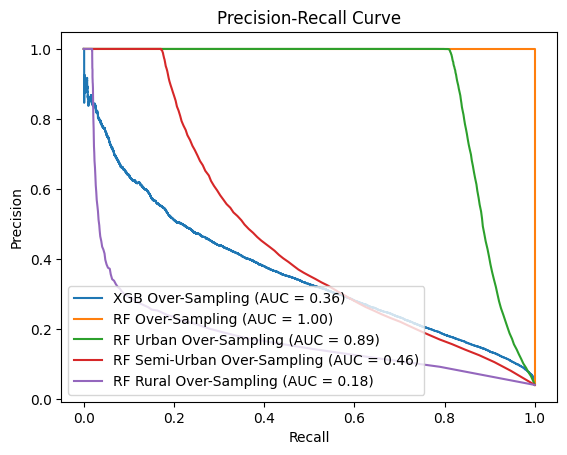

In [ ]:
#plt.plot(recall_nb_over, precision_nb_over, label = 'NB Over-Sampling (AUC = %0.2f)' % auc_pr_nb_over)
plt.plot(recall_xgb_over, precision_xgb_over, label = 'XGB Over-Sampling (AUC = %0.2f)' % auc_pr_xgb_over)
plt.plot(recall_rf_over, precision_rf_over, label='RF Over-Sampling (AUC = %0.2f)' % auc_pr_rf_over)
plt.plot(recall_rf_urban_over, precision_rf_urban_over, label='RF Urban Over-Sampling (AUC = %0.2f)' % auc_pr_rf_urban_over)
plt.plot(recall_rf_semi_urban_over, precision_rf_semi_urban_over, label='RF Semi-Urban Over-Sampling (AUC = %0.2f)' % auc_pr_rf_semi_urban_over)
plt.plot(recall_rf_rural_over, precision_rf_rural_over, label='RF Rural Over-Sampling (AUC = %0.2f)' % auc_pr_rf_rural_over)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()